In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.lagrangian_datatools import *
import src.data.statistics as ds
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
import importlib
importlib.reload(ds)

<module 'data.statistics' from '/home/maria/Documents/github/multiscale-turbulence/src/data/statistics.py'>

In [4]:
# tau goes from 1 to 1000
list_taus = np.unique([int(t) for t in np.logspace(0, 3)]).astype(int)
list_n=[2,4,6]

# Statistics of data generated with the Scale Invariant Diffusion model

This set corresponds to a model trained for 350K steps (~220 epochs), with a learning rate of 1e-05, and 7 levels of resolution. Fast-sampling was not applied.    
**Model date**: 20230720  
**Model JOB ID**: 0000001

In [5]:
# Loading the data
filename = "../experiments/20230720/0000001/generated_samples_3d.npy"
# Original data
orig_fname = "../data/subsampled_velocities.npy"

In [6]:

new_d = ParticleDataset(npy_filename=filename, root_dir=".")
orig_data = ParticleDataset(npy_filename=orig_fname, root_dir=".")

In [7]:
len(new_d)

2048

In [8]:
# one sample
sample_1 = new_d[10]
print(sample_1.shape)
print(sample_1)


(2000, 3)
[[-2.7518935   3.5635862  -1.074496  ]
 [ 2.130226   -1.699055    0.53489494]
 [ 0.9968602  -1.5134883   0.96187943]
 ...
 [ 0.2236251   0.25053948  0.4031075 ]
 [ 0.07968895  0.19475067 -0.9140829 ]
 [-0.05588321  0.40490973 -0.12692457]]


In [9]:
sample_1[:,0].shape

(2000,)

In [10]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

Text(0.5, 0, 't')

In [11]:
ax = plt.axes(projection='3d')
ax.plot3D(sample_1[:,0], sample_1[:,1], sample_1[:,2], 'blue')

In [12]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

In [13]:
new_d.data.shape

(2048, 2000, 3)

In [14]:
stat.trajectory[:,:, 0].shape

(1000, 2000)

## Lagrangian structures

$$
S_n(\tau) = \left \langle (\delta_{\tau}V)^n \right \rangle
$$

$\tau$ is defined as the range of integers between $10^0$ and $10^3$

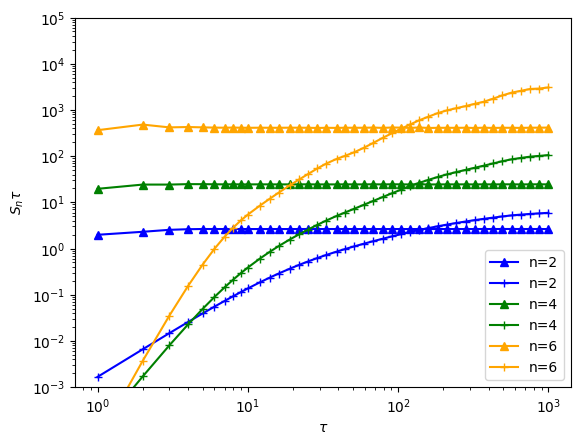

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

$$
F_n(\tau) = \frac{\left \langle (\delta_{\tau}V)^n \right \rangle}{\left \langle (\delta_{\tau}V)^{n/2} \right \rangle ^2}
$$

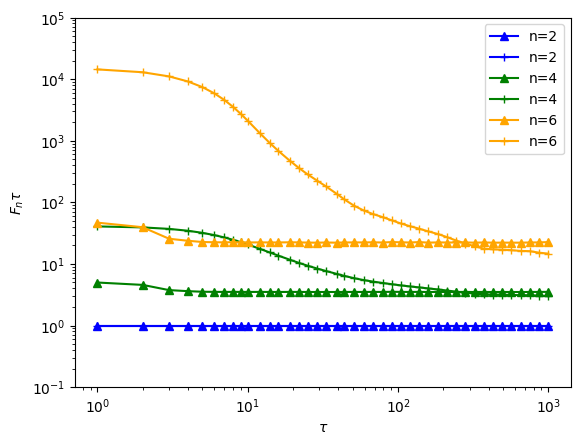

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

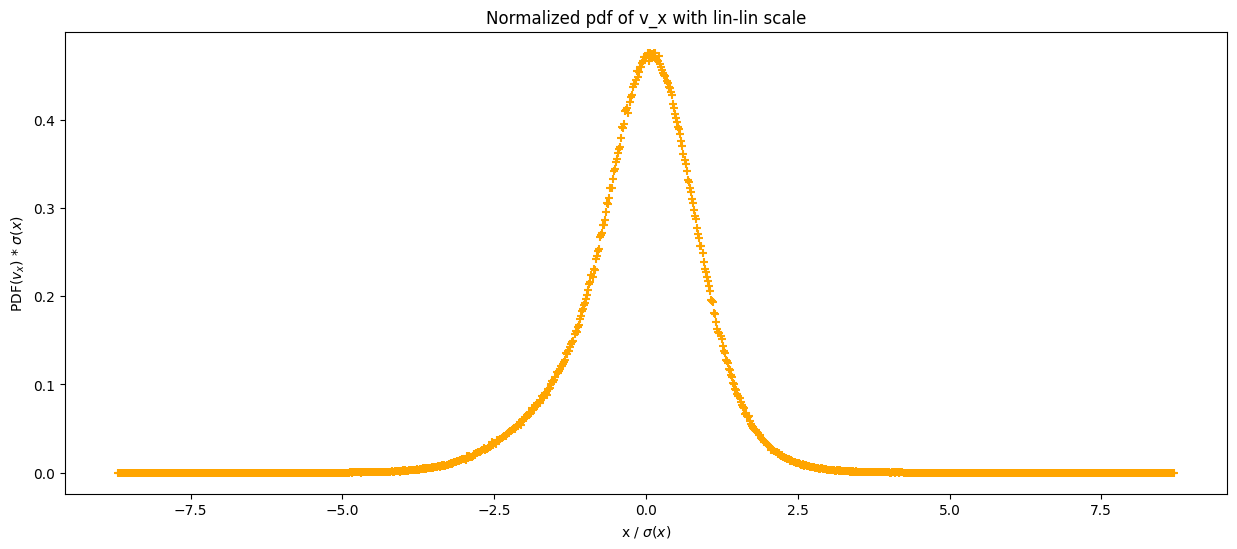

In [17]:
stat.plot_vx_norm_pdf(y_log=False)

In [18]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True, s=1)

In [19]:
stat.plot_ax_norm_pdf()

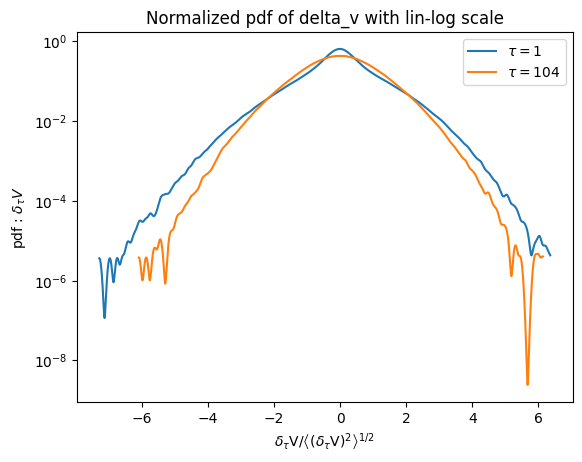

In [20]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

<div style="border-bottom: 1px solid black;"></div>

This set corresponds to a model trained for 1.5M steps (~500 epochs), with a learning rate of 1e-05. In this experiment, a new loss was used: MSE that is computed only over the 2000 values, i.e. excluding the values that correspond to padding.  
**Model date**: 20230724  
**Model JOB ID**: 1312120

In [19]:
# Loading the data
filename = "../experiments/20230724/1312120/generated_samples_3d.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [20]:
# one sample
sample_1 = new_d[10]

In [21]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

Text(0.5, 0, 't')

In [22]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

## Lagrangian structures

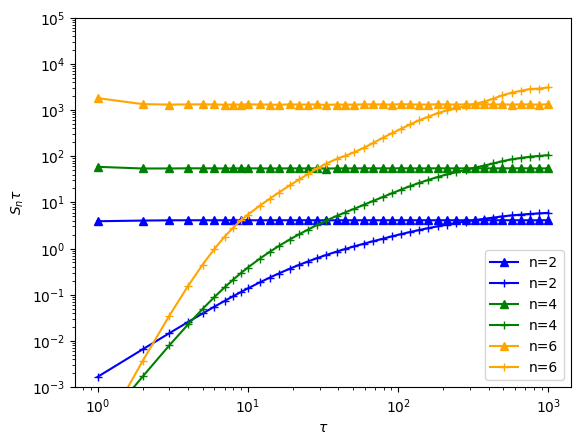

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

In [46]:
stat.plot_vx_norm_pdf(y_log=False)

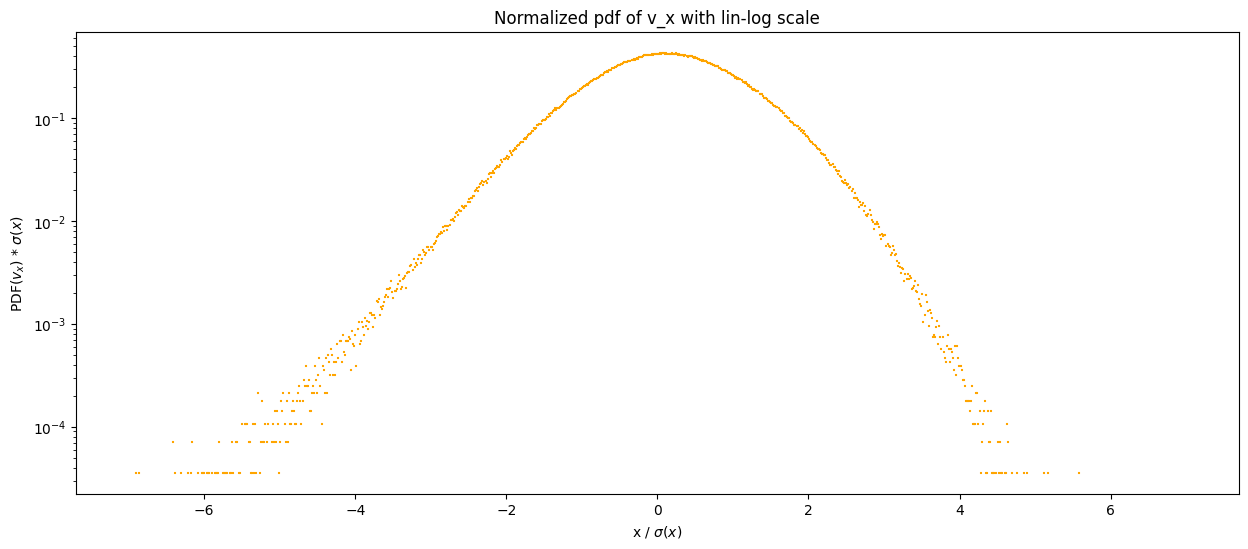

In [48]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True, s=1)

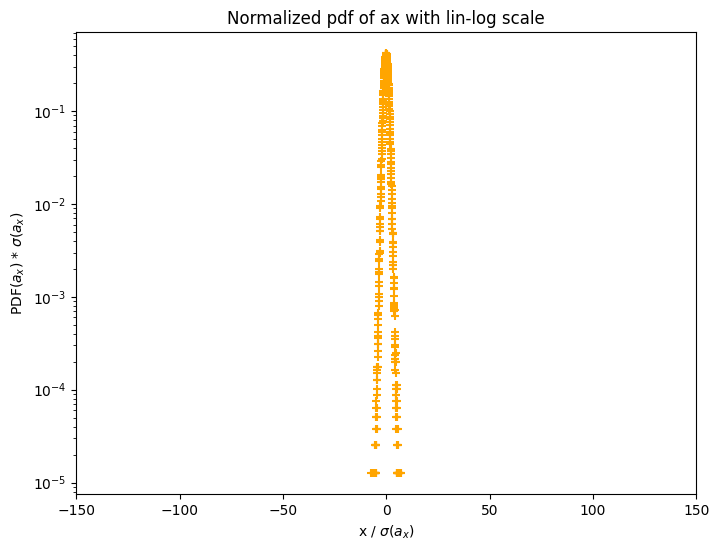

In [42]:
stat.plot_ax_norm_pdf()

In [43]:
stat.plot_several_tau_delta_velocity(list_taus[::25], coordinate=0, clip=(-20,20), y_log=True)

# New scheduler experiments

This set corresponds to a model trained for 1.5M steps (~500 epochs), with a learning rate of 1e-05. In this experiment, a new scheduler was used: tanh61, with 400 diffusion steps.  
**Model date**: 20230727  
**Model JOB ID**: 1313087

In [23]:
# Loading the data
filename = "../experiments/20230727/1313087/generated_samples_3d.npy"
new_d = ParticleDataset(npy_filename=filename, root_dir=".")

In [24]:
# one sample
sample_1 = new_d[10]

Text(0.5, 0, 't')

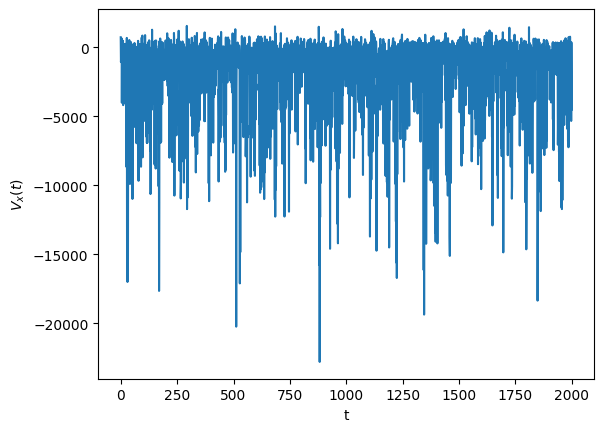

In [25]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

In [26]:
del new_d
new_d = ParticleDataset(npy_filename=filename, root_dir=".")
stat = ds.StatisticalPhysics(new_d[:1000])
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

## Lagrangian structures

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

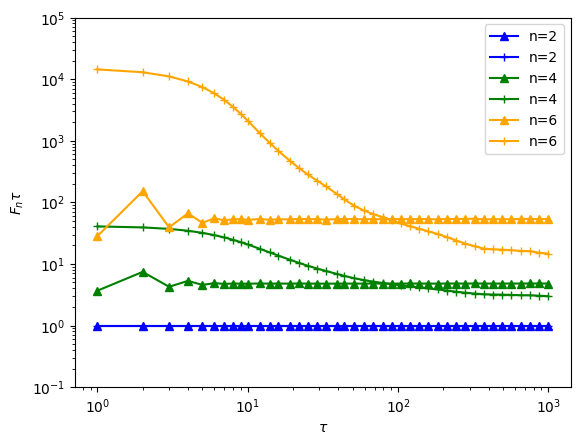

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

In [27]:
stat.plot_vx_norm_pdf(y_log=False)

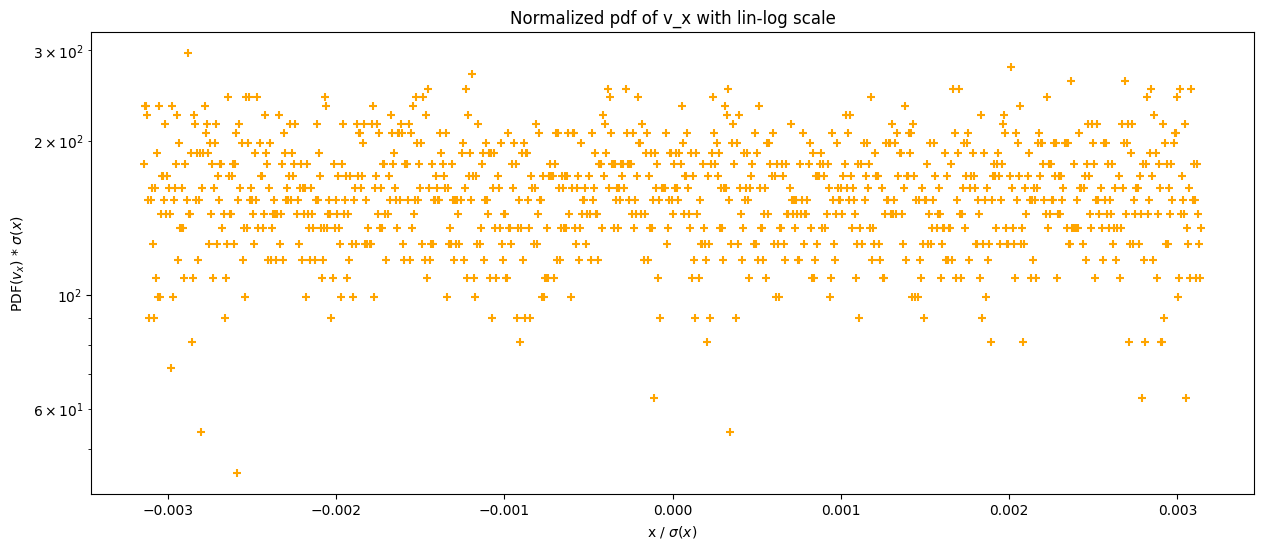

In [28]:
stat.plot_vx_norm_pdf(y_log=True)

<div style="border-bottom: 1px solid black;"></div>